In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
#import tweepy as tw #for accessing Twitter API

# For Building the model
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# Read and clean data

In [3]:
df = pd.read_csv("data/Reddit_Data.csv")
df = df.rename(columns={'clean_comment':'text', 'category':'score'})
df.head(10)

,text,score
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


In [4]:
df.describe().loc["count"]

score    37249.0
Name: count, dtype: float64

In [5]:
df.isnull().sum() #100 adat hiányzik

text     100
score      0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True) #NA adatok eldobása

In [7]:
df.shape

(37149, 2)

# Insights

In [ ]:
df["sentiment"] = df["score"].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df.head(10)

In [ ]:
df.drop(columns="score").groupby("sentiment").count().plot(kind="bar")

In [ ]:
df["length"] = df.text.str.split().apply(len) #get num of words of text

In [ ]:
df["length"].hist(by=df["sentiment"], bins=range(0,100,10))

In [ ]:
#### Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.sentiment==category]['text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(df, 'Positive')
     
# Negative tweet words
wordcount_gen(df, 'Negative')
     
# Neutral tweet words
wordcount_gen(df, 'Neutral')

# Text preprocessing

In [19]:
#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/nomino/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nomino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
my_stopwords = stopwords.words("english")

In [21]:
def text_preprocess(text):
    ''' Convert tweet text into a sequence of words '''
    # convert to lowercase
    text = text.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in my_stopwords]
    # apply stemming
    words = [stemmer.stem(w) for w in words]
    #apply lemmatize
    words = [lemmatizer.lemmatize(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['text'][0])
print("\nProcessed tweet ->", text_preprocess(df['text'][0]))


Original tweet ->  family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches 

Processed tweet -> ['famili', 'mormon', 'never', 'tri', 'explain', 'still', 'stare', 'puzzl', 'time', 'time', 'like', 'kind', 'strang', 'creatur', 'nonetheless', 'come', 'admir', 'patienc', 'calm', 'equanim', 'accept', 'compass', 'develop', 'thing', 'buddhism', 'teach']


In [22]:
X = list(map(text_preprocess, df["text"]))

In [23]:
Y = list(df["score"])

In [24]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=1)

# TF-IDF

In [13]:
from operator import itemgetter
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
X_train = np.array([' '.join(words) for words in X_tr])
X_test = np.array([' '.join(words) for words in X_te])
print(X_train.shape, X_test.shape)

(26004,) (11145,)


(array([1.8238e+04, 4.1020e+03, 1.5140e+03, 7.8600e+02, 3.9400e+02,
        2.4400e+02, 1.7900e+02, 9.6000e+01, 8.5000e+01, 7.7000e+01,
        3.9000e+01, 4.5000e+01, 2.7000e+01, 3.0000e+01, 2.0000e+01,
        1.5000e+01, 9.0000e+00, 1.4000e+01, 1.0000e+01]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
 <a list of 19 Patch objects>)

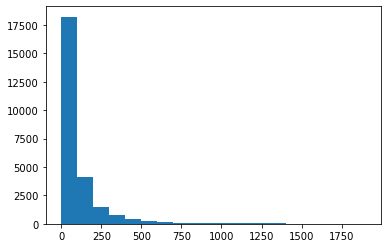

In [15]:
plt.hist(list(map(len, X_train)), bins=range(0,2000,100))

In [26]:
dim = 250
vectorizer = TfidfVectorizer(max_features=dim)

In [27]:
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
y_train = y_tr
y_test = y_te

In [18]:
vocab = vectorizer.vocabulary_

In [19]:
sorted(vocab.items(), key=itemgetter(1), reverse=True)[:10]

[('year', 249),
 ('ye', 248),
 ('wrong', 247),
 ('would', 246),
 ('world', 245),
 ('work', 244),
 ('word', 243),
 ('without', 242),
 ('win', 241),
 ('well', 240)]

# Word2Vec

In [36]:
from gensim.models.word2vec import Word2Vec

In [37]:
dim=100
window=5
min_count=1
workers=2

In [38]:
embedder = Word2Vec(X_tr, vector_size=dim, window=window, min_count=min_count, workers=workers)

In [39]:
def w2v_infer_vector(model, sentence):
    keys = [w for w in sentence if w in model.wv]
    if len(keys) > 0:
        return np.mean(model.wv[keys], axis=0)
    else:
        return np.zeros(model.vector_size)

In [40]:
X_train = [list(w2v_infer_vector(embedder, sentence)) for sentence in X_tr]
X_test = [list(w2v_infer_vector(embedder, sentence)) for sentence in X_te]

X_train = np.array(X_train)
X_test = np.array(X_test)

print(X_train.shape, X_test.shape)

(26004, 100) (11145, 100)


In [ ]:
columns = ["%s_%i" % ("word2vec", i) for i in range(X_train.shape[1])]

# Doc2Vec

In [43]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [44]:
dim=100
window=5
min_count=1
epochs = 10
workers=2

In [45]:
tagged_doc = [TaggedDocument(doc, [idx]) for idx, doc in enumerate(X_tr)]
embedder = Doc2Vec(tagged_doc, vector_size=dim, window=window, min_count=min_count, epochs=epochs, workers=workers)

In [46]:
X_train = [list(embedder.infer_vector(sentence)) for sentence in X_tr]
X_test = [list(embedder.infer_vector(sentence)) for sentence in X_te]

X_train = np.array(X_train)
X_test = np.array(X_test)

print(X_train.shape, X_test.shape)

(26004, 100) (11145, 100)


# Evaluate

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, recall_score, precision_score, matthews_corrcoef

In [22]:
MODELS = dict(#[(solver,LogisticRegression(solver=solver)) for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']])
[("Nearest Neighbors", KNeighborsClassifier()),
("Random Forest", RandomForestClassifier()),
("Neural Net", MLPClassifier()),
("Bernoulli Naive Bayes", BernoulliNB()),
("Logistic Regression", LogisticRegression())])
MODELS["Dummy (stratified)"] = DummyClassifier(strategy='stratified')
MODELS["Dummy (uniform)"] = DummyClassifier(strategy='uniform')

In [30]:
MODELS = {}
MODELS["Dummy (stratified)"] = DummyClassifier(strategy='stratified')
MODELS["Dummy (uniform)"] = DummyClassifier(strategy='uniform')

In [31]:
def metrics2df(metrics_dict):
    records = []
    for model in metrics_dict:
        for part in metrics_dict[model]:
            for metric in metrics_dict[model][part]:
                score = metrics_dict[model][part][metric]
                records.append([model, part, metric, score])
    return pd.DataFrame(records, columns=["model","part","metric","score"])

In [32]:
def calculate_metrics(model, X, y, multiclass=False, show_confusion_matrix=False, verbose=True):
    y_proba = model.predict_proba(X)
    y_pred = list(map(lambda x: x-1, np.argmax(y_proba, axis=1)))
    if show_confusion_matrix:
        cm = confusion_matrix(y, y_pred)
        print(model)
        print(cm)
    if multiclass is None:
        multiclass = len(set(y)) > 2
    average = "macro" if multiclass else "binary"
    metrics = {}
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average=average)
    rec = recall_score(y, y_pred, average=average)
    f1 = f1_score(y, y_pred, average=average)
    if multiclass:
        auc = roc_auc_score(y, y_proba, multi_class="ovo")
    else:
        auc = roc_auc_score(y, y_proba)
    metrics = {
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
        "auc": auc
    }
    print(metrics)
    return metrics, y_pred, y_proba

In [33]:
def evaluate_classifier(model, data, multiclass=False, show_confusion_matrix=False, verbose=True):
    X_train, X_test, y_train, y_test = data
    model = model.fit(X_train, y_train)
    results = {}
    if verbose:
        print(model)
        print("TRAIN:")
    results["train"] = calculate_metrics(model, X_train, y_train, multiclass, show_confusion_matrix, verbose)[0]
    if verbose:
        print("TEST:")
    results["test"] = calculate_metrics(model, X_test, y_test, multiclass, show_confusion_matrix, verbose)[0]
    if verbose:
        print()
    return results

In [34]:
def evaluate_classifiers(model_dict, vectors, labels, vectors_test=None, labels_test=None, test_size=0.3, multiclass=None, show_confusion_matrix=True, verbose=True):
    names, classifiers = zip(*model_dict.items())
    if vectors_test is None:
        train_test_data = train_test_split(vectors, labels, random_state=0, test_size=test_size)
    else:
        train_test_data = (vectors, vectors_test, labels, labels_test)
    results = {}
    for i in range(len(classifiers)):
        results[names[i]] = evaluate_classifier(classifiers[i], train_test_data, multiclass, show_confusion_matrix, verbose)
    metrics_df = metrics2df(results)
    metrics_df["dimension"] = vectors.shape[1]
    return metrics_df

In [37]:
metrics_df = evaluate_classifiers(MODELS, X_train, y_train, X_test, y_test)

DummyClassifier(strategy='stratified')
TRAIN:
DummyClassifier(strategy='stratified')
[[1307 2005 2492]
 [2016 3224 3827]
 [2507 3860 4766]]
{'acc': 0.3575219197046608, 'prec': 0.336283374052484, 'rec': 0.3362871122480053, 'f1': 0.33628402779936967, 'auc': 0.502215334186004}
TEST:
DummyClassifier(strategy='stratified')
[[ 562  843 1068]
 [ 883 1441 1651]
 [1055 1614 2028]]
{'acc': 0.3616868550919695, 'prec': 0.3405646490385095, 'rec': 0.34051167552419614, 'f1': 0.34052025565440514, 'auc': 0.505383756643147}

DummyClassifier(strategy='uniform')
TRAIN:
DummyClassifier(strategy='uniform')
[[ 5804     0     0]
 [ 9067     0     0]
 [11133     0     0]]
{'acc': 0.22319643131825873, 'prec': 0.07439881043941958, 'rec': 0.3333333333333333, 'f1': 0.1216465459423206, 'auc': 0.5}
TEST:
DummyClassifier(strategy='uniform')
[[2473    0    0]
 [3975    0    0]
 [4697    0    0]]
{'acc': 0.22189322566173172, 'prec': 0.07396440855391058, 'rec': 0.3333333333333333, 'f1': 0.12106525676800316, 'auc': 0.5}


/home/nomino/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nomino/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


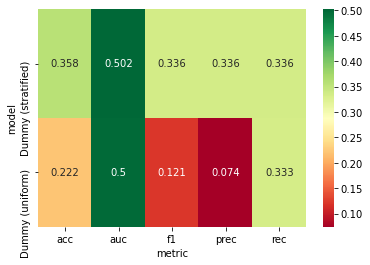

In [36]:
pivot_df = df[df["part"] == "test"].pivot(index="model", columns="metric", values="score")    
sns.heatmap(pivot_df, cmap='RdYlGn', annot=True, fmt=".3")#, ax=ax)#, vmin=0.5, vmax=1.0)

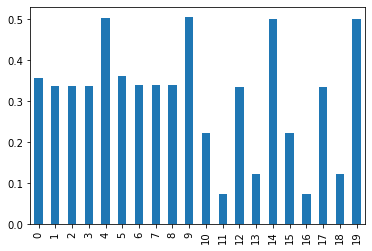

In [44]:
metrics_df["score"].plot(kind="bar")

part
test     AxesSubplot(0.125,0.125;0.775x0.755)
train    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

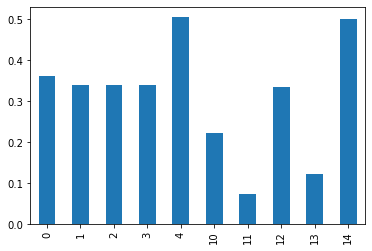

In [48]:
metrics_df.groupby("part")["score"].plot(kind="bar")

In [45]:
metrics_df.groupby?

Signature:
metrics_df.groupby(
    by=None,
    axis=0,
    level=None,
    as_index: bool = True,
    sort: bool = True,
    group_keys: bool = True,
    squeeze: bool = False,
    observed: bool = False,
) -> 'groupby_generic.DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A label or list of
    labels

# Results

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_clf_dim_heatmap(metrics_df, part="test", metric="f1", title=None, class_value=None, fsize=(8,4)):
    tmp_df = metrics_df[(metrics_df["part"]==part) & (metrics_df["metric"]==metric)]
    if class_value != None and "class" in metrics_df.columns:
        tmp_df = tmp_df[tmp_df["class"]==class_value]
    pivot_df = tmp_df.pivot(index="model", columns="dimension", values="score")    
    fig, ax = plt.subplots(1,1,figsize=fsize)
    sns.heatmap(pivot_df, cmap='RdYlGn', annot=True, fmt=".3", ax=ax)#, vmin=0.5, vmax=1.0)
    if title is not None:
        plt.title(title)
    else:
        plt.title("Metric: %s, Part: %s" % (metric, part))
    return fig
    
def train_test_dim_performance(metrics_df, metric="f1", title=None, class_value=None, fsize=(6,4)):
    tmp_df = metrics_df[metrics_df["metric"]==metric]
    if class_value != None and "class" in metrics_df.columns:
        tmp_df = tmp_df[tmp_df["class"]==class_value]
    fig, ax = plt.subplots(1,1,figsize=fsize)
    if title != None:
        plt.title(title)
    sns.lineplot(data=tmp_df, x="dimension", y="score", hue="model", style="part", ax=ax)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    return fig

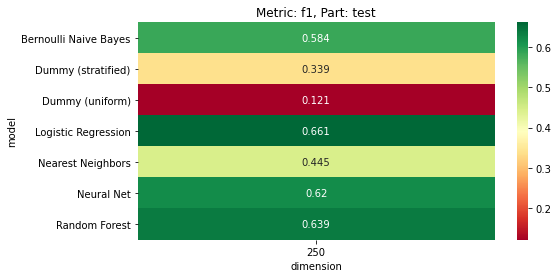

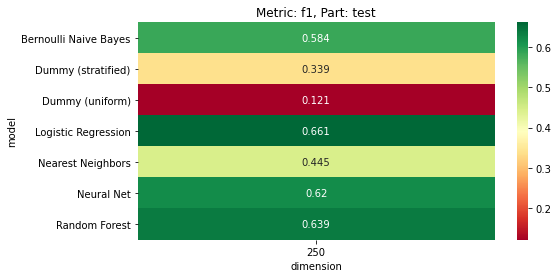

In [29]:
create_clf_dim_heatmap(df)

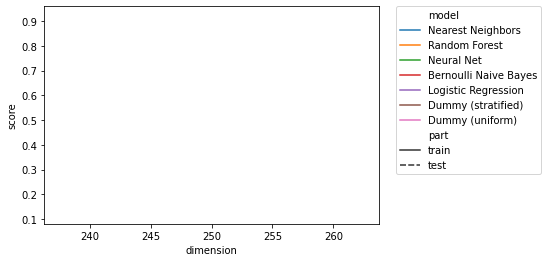

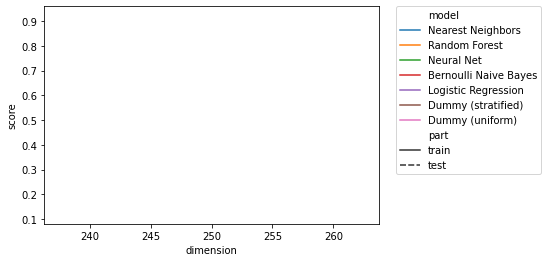

In [30]:
train_test_dim_performance(df)

# GloVe
https://www.kaggle.com/parthplc/glove-implementation/notebook

In [ ]:
from scipy import spatial
from sklearn.manifold import TSNE

# Neural Nets - LSTM

https://www.kaggle.com/kritanjalijain/twitter-sentiment-analysis-lstm

# Neural Net - BERT

https://www.tensorflow.org/text/tutorials/classify_text_with_bert